# Arizona Active Management Area Data 
***
#### Annual Supply and Demand
We are going to take a look at the **water use** and **water supply** by sector and source on an annual basis.

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Import CSV's
We are using Pandas to reaad both csv files that include annual AMA water data, as well as the csv that includes the business term definitions associated with the water data. This will help give context for our EDA.

In [3]:
waterdata = pd.read_csv('ama-demand-supply-data/AMA_demand_supply_from_DW .csv')

In [4]:
waterterms = pd.read_csv('ama-demand-supply-data/AMA_demand_supply_business_terms.csv')

In [5]:
waterdata.head(5)

,YEAR,AMA,SECTOR,CATEGORY,PARENT WATER TYPE OR SECTOR,BUDGET ELEMENT,QUANTITY
0,2021,PHOENIX AMA,Municipal,Demand,Municipal,Large Provider Residential Deliveries,563476
1,2021,PHOENIX AMA,Municipal,Demand,Municipal,Large Provider Non-Residential Deliveries,304201
2,2021,PHOENIX AMA,Municipal,Demand,Municipal,Large Provider Lost and Unaccounted for Water,234368
3,2021,PHOENIX AMA,Municipal,Demand,Municipal,Small Provider Deliveries,2185
4,2021,PHOENIX AMA,Municipal,Demand,Municipal,Urban Irrigation,105247


In [6]:
waterterms.head()

,Business_Term,BUSINESS_TERM_DESCRIPTION,Business_Term_Status
0,Annual Report Year,Calendar year during which annual water use wa...,S
1,Surface water,"A water type, Surface water is the waters of a...",S
2,Supply,The sources of water available for use by a ce...,S
3,Municipal,Municipal water use includes water delivered f...,S
4,Agricultural,Agricultural demand is composed of the use of ...,S


In [7]:
waterdata.shape

(7844, 7)

In [8]:
# Detect any missing values
waterdata.isna().sum()

YEAR                              0
AMA                               0
SECTOR                            0
CATEGORY                          0
PARENT WATER TYPE OR SECTOR    1247
BUDGET ELEMENT                    0
QUANTITY                          0
dtype: int64

#### Rename Columns

In [9]:
waterdata = waterdata.rename(columns={'YEAR': 'year', 'AMA': 'ama', 'SECTOR':'sector', 'CATEGORY': 'category',
                                      'PARENT WATER TYPE OR SECTOR':'watertype_sector', 'BUDGET ELEMENT':'budget_element',
                                      'QUANTITY':'quantity'})

In [10]:
waterdata.head()

,year,ama,sector,category,watertype_sector,budget_element,quantity
0,2021,PHOENIX AMA,Municipal,Demand,Municipal,Large Provider Residential Deliveries,563476
1,2021,PHOENIX AMA,Municipal,Demand,Municipal,Large Provider Non-Residential Deliveries,304201
2,2021,PHOENIX AMA,Municipal,Demand,Municipal,Large Provider Lost and Unaccounted for Water,234368
3,2021,PHOENIX AMA,Municipal,Demand,Municipal,Small Provider Deliveries,2185
4,2021,PHOENIX AMA,Municipal,Demand,Municipal,Urban Irrigation,105247


In [11]:
waterterms = waterterms.rename(columns={'Business_Term':'business_term', 'BUSINESS_TERM_DESCRIPTION': 'description', 'Business_Term_Status':'status'})

In [12]:
waterterms = waterterms.sort_values('business_term', ascending=True)

In [13]:
waterterms

,business_term,description,status
32,Active Management Area Exempt Well Population,Total annual population served by Exempt Wells...,S
33,Active Management Area Exempt Wells,Wells with a pump capacity equal to or less th...,S
61,Aeronautical Reconnaissance Coverage Geographi...,"A family of client software, server software, ...",S
4,Agricultural,Agricultural demand is composed of the use of ...,S
54,Agricultural Exception Users,Surface water right holders in Chino Valley Ir...,S
...,...,...,...
27,Urban Irrigation,Untreated water supplied by a municipal provid...,S
67,Water Management Assistance Program,Intended to provide financial and technical re...,S
21,Water withdrawn from wells,"""Water withdrawn from wells"" as a water type r...",S
22,Weighted Exchange Effluent,An accounting mechanism for effluent water exc...,S


### Phoenix AMA Demand and Supply

#### Supply for all Sectors for 2021

In [14]:
waterdata.head()

,year,ama,sector,category,watertype_sector,budget_element,quantity
0,2021,PHOENIX AMA,Municipal,Demand,Municipal,Large Provider Residential Deliveries,563476
1,2021,PHOENIX AMA,Municipal,Demand,Municipal,Large Provider Non-Residential Deliveries,304201
2,2021,PHOENIX AMA,Municipal,Demand,Municipal,Large Provider Lost and Unaccounted for Water,234368
3,2021,PHOENIX AMA,Municipal,Demand,Municipal,Small Provider Deliveries,2185
4,2021,PHOENIX AMA,Municipal,Demand,Municipal,Urban Irrigation,105247


In [44]:
waterdata_phxsup_2021 = waterdata[(waterdata['year'] == 2021) & (waterdata['ama'] == 'PHOENIX AMA') & (waterdata['category'] == 'Supply')]

In [45]:
waterdata_phxsup_2021

,year,ama,sector,category,watertype_sector,budget_element,quantity
11,2021,PHOENIX AMA,Municipal,Supply,NaN,CAP GSF,0
12,2021,PHOENIX AMA,Municipal,Supply,Groundwater,Groundwater,290049
13,2021,PHOENIX AMA,Municipal,Supply,AWS Groundwater Accounting,Excess,32100
14,2021,PHOENIX AMA,Municipal,Supply,Groundwater,Remediation water,4229
15,2021,PHOENIX AMA,Municipal,Supply,Surface Water,Surface Water,329324
16,2021,PHOENIX AMA,Municipal,Supply,CAP,CAP,328899
17,2021,PHOENIX AMA,Municipal,Supply,Effluent,Effluent,141458
18,2021,PHOENIX AMA,Municipal,Supply,Effluent,Weighted Exchange Effluent,33793
19,2021,PHOENIX AMA,Municipal,Supply,Spill,Spill,8446
20,2021,PHOENIX AMA,Municipal,Supply,CAP,Recovered CAP,49272


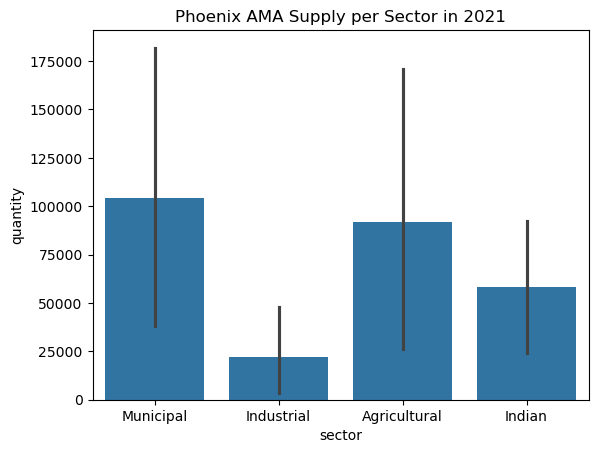

In [46]:
sns.barplot(data=waterdata_phxsup_2021, x='sector', y='quantity')
plt.title('Phoenix AMA Supply per Sector in 2021')
plt.show()

#### From here, we will determine the change in each of these sectors over the timespan where AMA data has been made available.
We can split it up by demand and supply to reduce the number of lines on one chart over the span of 36 years (1985 - 2021).

## Supply - Phoenix AMA (1985-2021)

In [47]:
municipal_data = waterdata_phxsup_2021[(waterdata_phxsup_2021['sector'] == 'Municipal')]

In [48]:
# Subtracting the AWS Groundwater Accounting Parent Water Type with Excess
total_sum_municipal = municipal_data['quantity'].sum() - municipal_data[municipal_data['budget_element'] == 'Excess']['quantity']

In [50]:
total_sum_municipal

13    1220032
Name: quantity, dtype: int64

In [111]:
waterdata_phxsup = waterdata[(waterdata['ama'] == 'PHOENIX AMA') & (waterdata['category'] == 'Supply')]

In [155]:
waterdata_phxsup.head(12)

,year,ama,sector,category,watertype_sector,budget_element,quantity
11,2021,PHOENIX AMA,Municipal,Supply,NaN,CAP GSF,0
12,2021,PHOENIX AMA,Municipal,Supply,Groundwater,Groundwater,290049
13,2021,PHOENIX AMA,Municipal,Supply,AWS Groundwater Accounting,Excess,32100
14,2021,PHOENIX AMA,Municipal,Supply,Groundwater,Remediation water,4229
15,2021,PHOENIX AMA,Municipal,Supply,Surface Water,Surface Water,329324
16,2021,PHOENIX AMA,Municipal,Supply,CAP,CAP,328899
17,2021,PHOENIX AMA,Municipal,Supply,Effluent,Effluent,141458
18,2021,PHOENIX AMA,Municipal,Supply,Effluent,Weighted Exchange Effluent,33793
19,2021,PHOENIX AMA,Municipal,Supply,Spill,Spill,8446
20,2021,PHOENIX AMA,Municipal,Supply,CAP,Recovered CAP,49272


In [163]:
grouped_totals = waterdata_phxsup.groupby(['year', 'sector'])['quantity'].sum()

In [164]:
grouped_totals

year  sector      
1985  Agricultural    1265632
      Indian           187698
      Industrial        88667
      Municipal        633501
1986  Agricultural    1140492
                       ...   
2020  Municipal       1234684
2021  Agricultural     734696
      Indian           233625
      Industrial       175382
      Municipal       1252132
Name: quantity, Length: 148, dtype: int64

In [165]:
excess_quantities = waterdata_phxsup[waterdata_phxsup['budget_element'] == 'Excess'].groupby(['year', 'sector'])['quantity'].sum()

In [166]:
excess_quantities

year  sector   
1995  Municipal        0
1996  Municipal       41
1997  Municipal      332
1998  Municipal      928
1999  Municipal     1681
2000  Municipal     3373
2001  Municipal     6661
2002  Municipal     9564
2003  Municipal    12334
2004  Municipal    18590
2005  Municipal    23850
2006  Municipal    29226
2007  Municipal    33423
2008  Municipal    32461
2009  Municipal    26269
2010  Municipal    26624
2011  Municipal    30407
2012  Municipal    30049
2013  Municipal    30967
2014  Municipal    30357
2015  Municipal    27436
2016  Municipal    27894
2017  Municipal    26661
2018  Municipal    25804
2019  Municipal    26378
2020  Municipal    31574
2021  Municipal    32100
Name: quantity, dtype: int64

In [181]:
merged_waterdata_phxsup_totals = pd.merge(grouped_totals, excess_quantities, on=['year', 'sector'], how='left', suffixes=('', '_excess'))

In [182]:
merged_waterdata_phxsup_totals

quantity  quantity_excess
year sector                                 
1985 Agricultural   1265632              NaN
     Indian          187698              NaN
     Industrial       88667              NaN
     Municipal       633501              NaN
1986 Agricultural   1140492              NaN
...                     ...              ...
2020 Municipal      1234684          31574.0
2021 Agricultural    734696              NaN
     Indian          233625              NaN
     Industrial      175382              NaN
     Municipal      1252132          32100.0

[148 rows x 2 columns]

In [183]:
waterdata_phxsup_totals = merged_waterdata_phxsup_totals['quantity'] - merged_waterdata_phxsup_totals['quantity_excess'].fillna(0)

In [184]:
waterdata_phxsup_totals

year  sector      
1985  Agricultural    1265632.0
      Indian           187698.0
      Industrial        88667.0
      Municipal        633501.0
1986  Agricultural    1140492.0
                        ...    
2020  Municipal       1203110.0
2021  Agricultural     734696.0
      Indian           233625.0
      Industrial       175382.0
      Municipal       1220032.0
Length: 148, dtype: float64

#### Next we will separate each sector by the parent water type and change the chart to a stacked object chart.

Looking at the categories and business terms chart, we have four total categories of types
1. Surface Water = Surface water + Spill
2. Colorado River = CAP + Recovered CAP
3. Ground water = Groundwater + AWS Groundwater Accounting (Excess)
4. Effluent = Effluent